# Install & Import

In [2]:
pip install tqdm --upgrade

In [3]:
pip install snscrape

In [4]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
!pip install scikit-learn

In [7]:
pip install emoji --upgrade

     -------------------------------------- 356.6/356.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=a4314d8f3c539069de496f50b847d80bde83970925ca659d2cefa408611b7f15
  Stored in directory: c:\users\m1ardhiz\appdata\local\pip\cache\wheels\a9\25\66\ae46b49b24c976a140abb666a8d84a74062c65cc4de5f78c57
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.5.0
    Uninstalling emoji-2.5.0:
      Successfully uninstalled emoji-2.5.0
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip install transformers

In [10]:
pip install -q transformers

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install -U nltk

In [12]:
pip install fuzzywuzzy

In [13]:
!pip install python-Levenshtein

In [14]:
pip install thefuzz

Note: you may need to restart the kernel to use updated packages.


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io
from collections import Counter

import re
import contractions # Sentiment Analysis- making abbrevations longer
import nltk
nltk.download('stopwords') #Sentiment Analysis- to remove stopwords
nltk.download('punkt')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import emoji #Sentiment Analysis- to remove emojis
import string #Sentiment Analysis- removing punctiations
import operator

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger') #Lemmatization
nltk.download('wordnet') #Lemmatization
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag 
from nltk.corpus import stopwords

from transformers import pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#for a faster processing where all CPU cores are used
from functools import partial
from itertools import repeat
from multiprocessing import Pool, freeze_support
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M1ARDHIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M1ARDHIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\M1ARDHIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\M1ARDHIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\M1ARDHIZ\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
pd.set_option('display.max_rows', 300)
pd.set_option('max_colwidth', 100)

In [17]:
ent_original=pd.read_csv('ent.csv')
ent=ent_original.copy()
df=ent_original.copy()
df=df.drop(columns=["Unnamed: 0"])
df.columns = ['user','date','content',"follow","friend","link","reply","quote","lan","rttw","quotw","mention","rt","like","tzone"]

C:\Users\M1ARDHIZ\AppData\Local\Temp\ipykernel_17764\194549199.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ent_original=pd.read_csv('ent.csv')


# Data Understanding

## Peak Quarters
Some companies such as FOXTV, LiveNation, EA,Disney have a high fluctations. Is it normal? Maybe something was wrong on scrapping phase. To check, make a comparison

1)From df dataframe, get one company's tweets for fluctuated years (EA1 and FOXTV1 are retrieved)

2)Make another scrap only for this company, where no other company's tweets were scrapped (EA2 and FOXTV2 are retrieved)

In [ ]:
# Plot data on yearly basis
fig, ax = plt.subplots(figsize=(12,4))
df.groupby(['year','user']).count()['date'].unstack().plot(ax=ax)
plt.legend(loc=2, prop={'size': 8})
plt.show()

In [ ]:
# Plot data on Quarterly basis
fig, ax = plt.subplots(figsize=(12,4))
df.groupby(['quarter','user']).count()['date'].unstack().plot(ax=ax)
plt.legend(loc=2, prop={'size': 8})
plt.show()

In [ ]:
# 1- From df dataframe, get one company's tweets for fluctuated years.
#From df, get FOXTV tweets and assign to FOXTV1 dataframe
FOXTV1=df[df["user"]=="FOXTV"]

#Filter the tweets in 2017, 2018 and 2019
FOXTV1=FOXTV1[(FOXTV1['date'] >= '2017-01-01') & (FOXTV1['date'] <= '2019-12-31')]

#Change the user from FOXTV to FOXTV1
FOXTV1.user="FOXTV1"

In [ ]:
# 1- From df dataframe, get one company's tweets for fluctuated years.
#From df, get EA tweets and assign to EA1 dataframe
EA1=df[df["user"]=="EA"]

#Filter the tweets in 2017, 2018 and 2019
EA1=EA1[(EA1['date'] >= '2015-01-01') & (EA1['date'] <= '2017-12-31')]

#Change the user from FOXTV to EA1
EA1.user="EA1"

In [ ]:
# 2- Make another scrap and get the same company's tweets for the same dates.
#FOXTV2
tweets = []

for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('from:FOXTV since:2017-01-01 until:2019-12-31').get_items())):
  tweets.append([tweet.user.username,    tweet.date,   tweet.rawContent,  tweet.user.followersCount, tweet.links,  tweet.replyCount,     tweet.quoteCount,     tweet.lang,
                 tweet.retweetedTweet,    tweet.quotedTweet,      tweet.mentionedUsers,        tweet.retweetCount,       tweet.likeCount              ])
  


FOXTV2 = pd.DataFrame(tweets)

# FOXTV2= FOXTV2.set_axis( ['user','date','content',"follow","friend","link","reply","quote","lan","rttw","quotw","mention","rt","like","tzone"], axis=1)
# FOXTV2.user="FOXTV2"

In [ ]:
# 2- Make another scrap and get the same company's tweets for the same dates.
#EA2
tweets = []

for i,tweet in tqdm(enumerate(sntwitter.TwitterSearchScraper('from:EA since:2015-01-01 until:2017-12-31').get_items())):
  tweets.append([tweet.user.username,    tweet.date,   tweet.rawContent,  tweet.user.followersCount, tweet.links,  tweet.replyCount,     tweet.quoteCount,     tweet.lang,
                 tweet.retweetedTweet,    tweet.quotedTweet,      tweet.mentionedUsers,        tweet.retweetCount,       tweet.likeCount              ])
  


EA2 = pd.DataFrame(tweets)

# EA2= EA2.set_axis( ['user','date','content',"follow","link","reply","quote","lan","rttw","quotw","mention","rt","like"], axis=1)
# EA2.user="EA2"

In [ ]:
#Assign Columns for new scrapped EA2 and FOXTV2. (We will use EA2 and FOXTV2 for comparison
columns2=['user','date','content',"follow","link","reply","quote","lan","rttw","quotw","mention","rt","like"]
EA2.columns=columns2
FOXTV2.columns=columns2

In [ ]:
#RUN ONLY ONCE
#Convert EA2.date into string
EA2.date=EA2.date.astype(str)

# Remove the last 14 digit (+00:00 and time) from date column
EA2.date= EA2.date.str[:-14]

#Convert date columnn into type:datetime
EA2.date=pd.to_datetime(EA2.date)

#Create year, half, and quarter column 
EA2["year"]=EA2.date.dt.to_period('Y')     
EA2["quarter"]=EA2.date.dt.to_period('Q')   

In [ ]:
#RUN ONLY ONCE
#Convert FOXTV2.date into string
FOXTV2.date=FOXTV2.date.astype(str)

# Remove the last 14 digit (+00:00 and time) from date column
FOXTV2.date= FOXTV2.date.str[:-14]

#Convert date columnn into type:datetime
FOXTV2.date=pd.to_datetime(FOXTV2.date)

#Create year, half, and quarter column 
FOXTV2["year"]=FOXTV2.date.dt.to_period('Y')     
FOXTV2["quarter"]=FOXTV2.date.dt.to_period('Q')   

In [ ]:
#Compare FOXTV1 and FOXTV2
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,2))

FOXTV1.groupby("quarter").size().plot(kind='line',ax=ax1)
ax1.set_title("FOXTV1")

FOXTV2.groupby("quarter").size().plot(kind='line',ax=ax2)
ax2.set_title("FOXTV2")
plt.show()

In [ ]:
#Compare EA1 and EA2
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(8,2))

EA1.groupby("quarter").size().plot(kind='line',ax=ax1)
ax1.set_title("EA1")

EA2.groupby("quarter").size().plot(kind='line',ax=ax2)
ax2.set_title("EA2")
plt.show()

## Peak Quarters 2
The significant variations in tweet amounts between the various quarters might be a sign that something special or important occurred during those intervals, prompting the businesses to tweet more frequently. Check the most common words

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
# Create a set of stopwords to exclude from the analysis
from gensim.parsing.preprocessing import STOPWORDS as gensim_stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk_stopwords = set(nltk.corpus.stopwords.words('english'))
gensim_stopwords = set(gensim_stopwords)

all_stopwords = set()
all_stopwords.update(nltk_stopwords, gensim_stopwords)

In [ ]:
# Define a function to lowercase and tokenize the text
def tokenize(text):
    return [word.lower() for word in word_tokenize(text) if word.lower() not in all_stopwords and word.isalpha()]

# Tokenize the content column and create a list of all words
tokens = [tokenize(content) for content in EA1['content']]
all_words = [word for content_words in tokens for word in content_words]

# Get the 200 most frequent words
word_freq = Counter(all_words)
top_words = word_freq.most_common(200)

pd.DataFrame(top_words)

In [ ]:
#Define a function to check if a string in content column contains the word "battlefield"
def contains_battlefield(s):
    if 'battlefield' in s.lower():
        return 1
    else:
        return 0

# Apply the function to the 'tweet content' column of your dataframe
EA1['has_battlefield'] = EA1['content'].apply(contains_battlefield)

In [ ]:
# calculate total tweet count and has_battlefield count for each quarter
EA1_counts = EA1.groupby('quarter').agg(total_tweets=('user', 'count'),
                                        has_battlefield=('has_battlefield', 'sum'))

# plot total tweet count and has_battlefield count on the same y-axis
EA1_counts.plot(kind='line', y=['total_tweets', 'has_battlefield'], color=['blue', 'red'], figsize=(8,3))

# add labels and title
plt.xlabel('Quarter')
plt.ylabel('Tweet Count')
plt.title('Battefield Mentions vs Total Tweets')

plt.show()


In [ ]:
df.head()

## Correlation Matrix with Followers and Friends

In [ ]:
df.groupby("user").mean("rt")[["friend","rt"]].plot.scatter(x="friend",y="rt",figsize=(5,3))
plt.xlabel("Friends Count",fontsize=10)
plt.ylabel("Average Retweets Count",fontsize=10)

## Daily & Monthly Fluctuations

In [18]:
# RUN ONLY ONCE
print("Number of columns that do NOT contain +00:00 in date column: ",len(df[~df["date"].str.contains("+00:00",regex=False)]))
print("All rows in date column contains +00:00")

# Remove the last 6 digit (+00:00) from date column
df.date= df.date.str[:-6]

#Split date column into 2 columns: dates and time
df['dates'] = pd.to_datetime(df['date']).dt.date
df['time'] = pd.to_datetime(df['date']).dt.time

#Drop initial date column
df=df.drop(["date"],axis=1)

#Rename dates column as "date"
df=df.rename(columns={"dates": "date"})

#Drop tzone column, as it only contains +00:00.
df=df.drop(["tzone"],axis=1)

#Get the hours from time
df["time"]=df["time"].astype("str").str[0:2]

#Clean NaN values in df.time (only 1 row)
df=df[df["time"]!='Na']

#Convert time to integer
df.time=df.time.astype(int)

#Convert to NY time (UTC-4)
df.time=df.time-4

#Convert the negative times
df.loc[df.time==-4,"time"]=20
df.loc[df.time==-3,"time"]=21
df.loc[df.time==-2,"time"]=22
df.loc[df.time==-1,"time"]=23   

Number of columns that do NOT contain +00:00 in date column:  1
All rows in date column contains +00:00


In [19]:
#Create bins for partofday
bins={0:"latenight",6:"morning",12:"afternoon",18:"evening"}
df["daytime"]=df.time.astype(str)
df["daytime"]=df["daytime"].str[0:2].astype('int')
df["partofday"]=df["daytime"]
df["partofday"]=pd.cut(df["partofday"],bins=[0,6,12,18,23],labels=['latenight','morning','afternoon','evening'],include_lowest=True)

df.drop(columns=["time"],inplace=True)
df.rename(columns={"daytime":"time"},inplace=True)

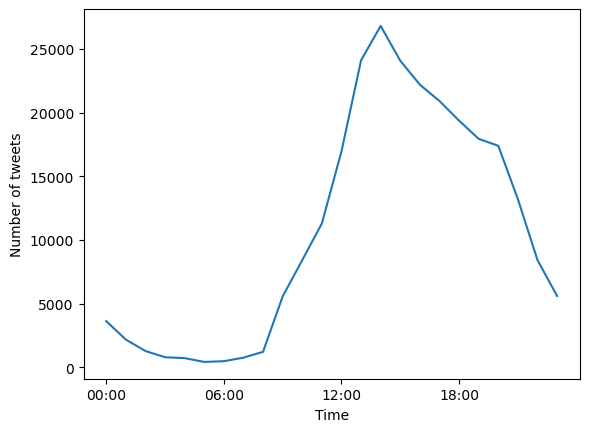

In [20]:
#Visualize number of tweets by time
df.time=df.time.astype('str')
df["times"]=df.time.copy()
df.times=df.time + ':00'
df.loc[df.times=='0:00',"times"]='00:00'
df['times'] = pd.to_datetime(df['times']).dt.time
df_times=pd.DataFrame(df.groupby("times").count()["user"])
df_times["times"]=df_times.index

ax=df_times.plot(legend=False)
ax.set_xticks([df_times.times[0],df_times.times[6],df_times.times[12],df_times.times[18]])
plt.xlabel("Time")
plt.ylabel("Number of tweets")
plt.show()

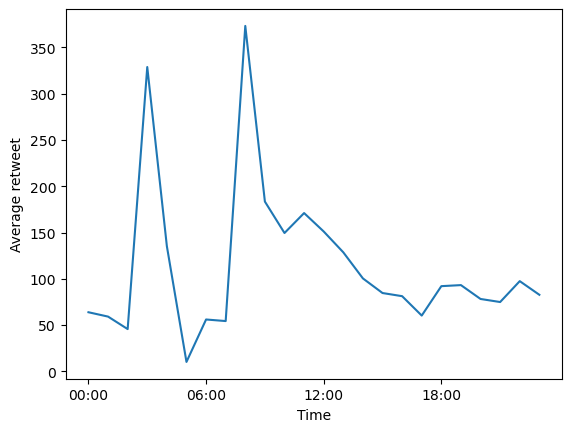

In [21]:
df_times_rt=pd.DataFrame(df.groupby("times").mean()["rt"])
df_times_rt["times"]=df_times_rt.index

ax=df_times_rt.plot(legend=False)
ax.set_xticks([df_times_rt.times[0],df_times_rt.times[6],df_times_rt.times[12],df_times_rt.times[18]])
plt.xlabel("Time")
plt.ylabel("Average retweet")
plt.show()

In [22]:
df[(df.rt>10000) & (df.time=='4')]

,user,content,follow,friend,link,reply,quote,lan,rttw,quotw,mention,rt,like,date,time,partofday,times
18317,netflix,Hold on tight! \n\nAlice in Borderland Season 2 is now on Netflix! https://t.co/1dB2K4HXzl,21437908.0,2252.0,NaN,777.0,6226.0,en,NaN,NaN,NaN,10819.0,39240.0,2022-12-22,4,latenight,04:00:00
33163,netflix,name a more iconic duo. i will NOT wait. https://t.co/8Iz0sPGWmH,21437946.0,2252.0,NaN,348.0,415.0,en,NaN,NaN,NaN,11843.0,33053.0,2017-10-27,4,latenight,04:00:00


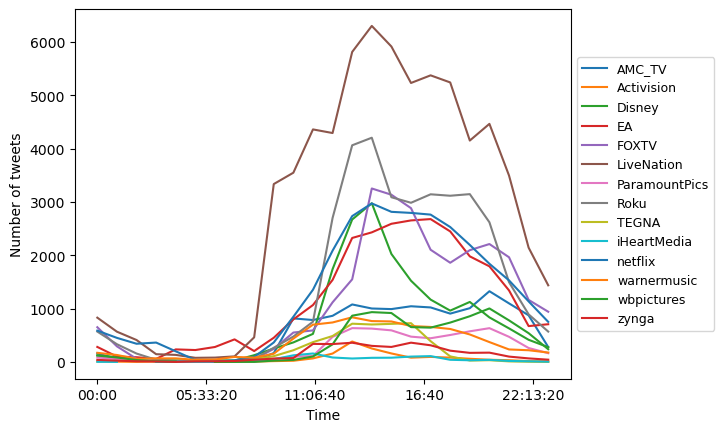

In [23]:
#Create time-number of tweets graph
df_grouped=pd.DataFrame(df.groupby(["user","times"]).count())
df_grouped=df_grouped.reset_index()

df_pivot=df_grouped.set_index(["times","user"])["content"].unstack()
ax=df_pivot.plot.line()

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 9})
plt.ylabel("Number of tweets")
plt.xlabel("Time")
plt.show()

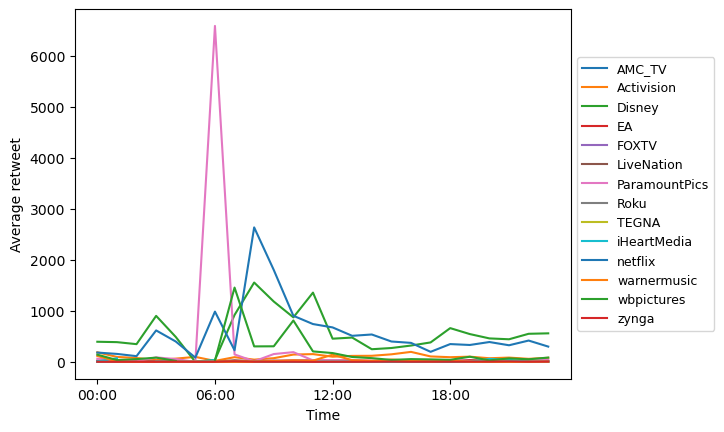

In [24]:
#Adjust time-number of tweets graph 
df_grouped=pd.DataFrame(df.groupby(["user","times"]).mean("rt"))
df_grouped=df_grouped.reset_index()

df_pivot=df_grouped.set_index(["times","user"])["rt"].unstack()
ax=df_pivot.plot.line()
ax.set_xticks([df_times_rt.times[0],df_times_rt.times[6],df_times_rt.times[12],df_times_rt.times[18]])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 9})
plt.ylabel("Average retweet")
plt.xlabel("Time")
plt.show()

In [25]:
#Explanation of Paramountpics peak
pd.set_option('display.max_rows', 300)
pd.set_option('max_colwidth', 1220)
df[(df.user=="ParamountPics") & (df.time=='6')][["user","content","reply","date","times","like","rt","mention"]]

,user,content,reply,date,times,like,rt,mention
50299,ParamountPics,"Sonic The Hedgehog is speeding to theatres for a big screen adventure for the whole family! Watch the new @SonicMovie trailer now, and #CatchSonic in theatres February 14! https://t.co/UUo9ctMbte",1520.0,2019-11-12,06:00:00,50510.0,13159.0,"[User(username='SonicMovie', id=1011719605981593600, displayname='Sonic the Hedgehog', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"
54150,ParamountPics,#HeA10When he’s as funny as @nottjmiller in She’s Out of My League (@TweetYourRating),0.0,2010-02-26,06:00:00,0.0,0.0,"[User(username='nottjmiller', id=20035593, displayname='t.j. miller', rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None), User(username='TweetYourRating', id=85391904, displayname=""She'sOutOfMyLeague"", rawDescription=None, renderedDescription=None, descriptionLinks=None, verified=None, created=None, followersCount=None, friendsCount=None, statusesCount=None, favouritesCount=None, listedCount=None, mediaCount=None, location=None, protected=None, link=None, profileImageUrl=None, profileBannerUrl=None, label=None)]"


In [26]:
#RUN ONLY ONCE
df["month"]=df.date.astype("str").str[5:7]

In [27]:
df_month=pd.DataFrame(df.groupby("month").count()["user"])
df_month["month"]=df_month.index

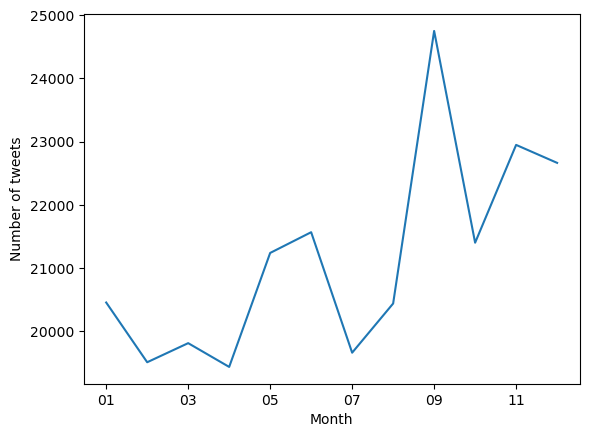

In [28]:
df_month=pd.DataFrame(df.groupby("month").count()["user"])
df_month["month"]=df_month.index

ax=df_month.plot(legend=False)

plt.xlabel("Month")
plt.ylabel("Number of tweets")
plt.show()

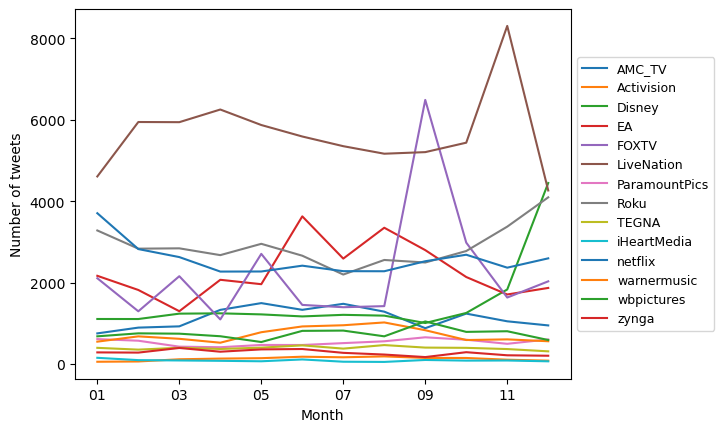

In [29]:
#Create graph for monthly fluctations of tweets
df_grouped2=pd.DataFrame(df.groupby(["user","month"]).count()["content"])
df_grouped2=df_grouped2.reset_index()

df_pivot2=df_grouped2.set_index(["month","user"])["content"].unstack()
ax=df_pivot2.plot.line()
#ax.set_xticks([df_times_rt.times[0],df_times_rt.times[6],df_times_rt.times[12],df_times_rt.times[18]])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 9})
plt.ylabel("Number of tweets")
plt.xlabel("Month")
plt.show()

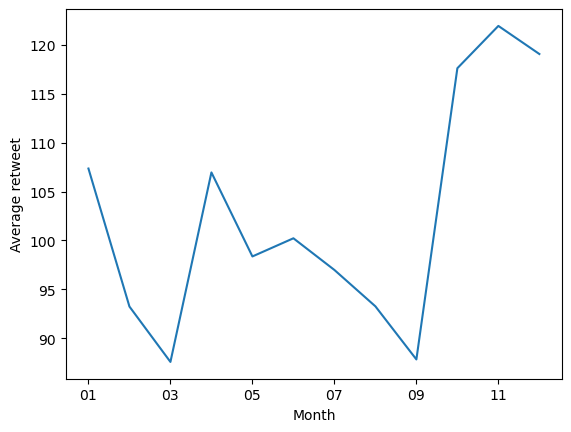

In [30]:
#Create graph for monthly fluctations of retweets
df_month_rt=pd.DataFrame(df.groupby("month").mean()["rt"])
df_month_rt["month"]=df_month_rt.index

ax=df_month_rt.plot(legend=False)

plt.xlabel("Month")
plt.ylabel("Average retweet")
plt.show()

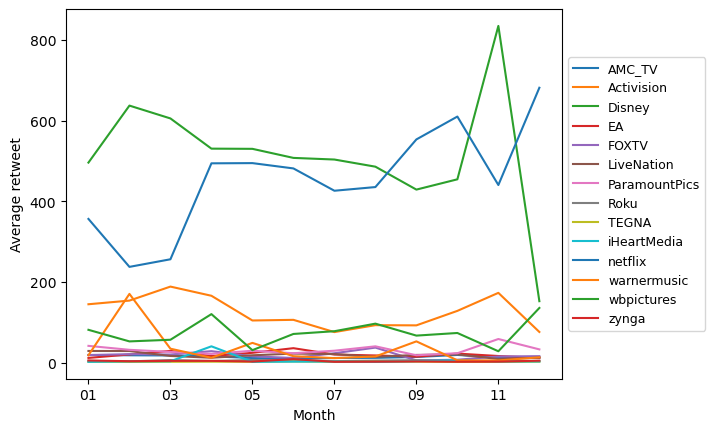

In [31]:
#Create graph for monthly fluctations of retweets for each company
df_grouped2=pd.DataFrame(df.groupby(["user","month"]).mean("rt"))
df_grouped2=df_grouped2.reset_index()

df_pivot2=df_grouped2.set_index(["month","user"])["rt"].unstack()
ax=df_pivot2.plot.line()
#ax.set_xticks([df_times_rt.times[0],df_times_rt.times[6],df_times_rt.times[12],df_times_rt.times[18]])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),prop={'size': 9})
plt.ylabel("Average retweet")
plt.xlabel("Month")
plt.show()

# Data Preparation

## Context Based Columns

In [32]:
#NaN value count
df.isna().sum() / len(df) * 100

user           0.000000
content        0.000000
follow         0.000394
friend         0.000394
link          64.892574
reply          0.000394
quote          0.000394
lan            0.000394
rttw         100.000000
quotw         98.415881
mention       37.676205
rt             0.000394
like           0.000394
date           0.000000
time           0.000000
partofday      0.000000
times          0.000000
month          0.000000
dtype: float64

In [33]:
#Drop quoted and retweeted tweets. We are looking for original tweets
df=df[df.quotw.isna()]
df=df[df.rttw.isna()]

In [34]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [35]:
#NaN value count
df.isna().sum() / len(df) * 100

user           0.000000
content        0.000000
follow         0.000400
friend         0.000400
link          65.214172
reply          0.000400
quote          0.000400
lan            0.000400
rttw         100.000000
quotw        100.000000
mention       37.253576
rt             0.000400
like           0.000400
date           0.000000
time           0.000000
partofday      0.000000
times          0.000000
month          0.000000
dtype: float64

In [36]:
#Drop rttw and quotw columns
df.drop(columns=["rttw","quotw"],inplace=True)

In [37]:
#Although retweets are dropped, there are 8269 rows that were not original tweets but rather RT. Their quottw and rttw columns were NaN.
#But the original context contained RT @. The latest date is 2016. Drop them.
print("Number of leftover RT tweets:",len(df[df.content.str.contains("RT@")])+len(df[df.content.str.contains("RT @")])+len(df[df.content.str.contains("RT  @")]))
df=df[~df.content.str.contains("RT@")]
df=df[~df.content.str.contains("RT @")]
df=df[~df.content.str.contains("RT  @")]

Number of leftover RT tweets: 8269


In [38]:
##Drop NaN values in follow column
df=df[~df.follow.isna()]

In [39]:
# RUN ONLY ONCE
#Check whether the float columns have decimals other than 0. (There shouldn't be any)
floatcolumns= ["follow","friend","reply","quote","rt","like"]
for i in floatcolumns: 
  print("Unique decimals of column",i,":",df[i].astype(str).str[-1].unique())

#Convert float columns into integer for faster processing
for i in floatcolumns:
 df[i]=df[i].astype(float)

Unique decimals of column follow : ['0']
Unique decimals of column friend : ['0']
Unique decimals of column reply : ['0']
Unique decimals of column quote : ['0']
Unique decimals of column rt : ['0']
Unique decimals of column like : ['0']


In [40]:
#Clean mention column
import re

# Define a regular expression to match the text after 'username=' and between single quotes
pattern = r"username='(.*?)'"

# Define a function to extract the name from each row of the 'mention' column, only for non-missing values
def extract_name(row):
    if isinstance(row, str):
        match = re.search(pattern, row)
        if match:
            return match.group(1)
    return row

# Apply the function to the 'mention' column to create a new column with the extracted names, while keeping missing values
df['mentioneduser'] = df['mention'].apply(extract_name)

#Drop mention column
df=df.drop(["mention"],axis=1)

#Change mentioneduser to mention
df=df.rename(columns={"mentioneduser": "mention"})

In [41]:
#Link column does not keep a meaningful value for analysis. Drop it
df.drop(columns=["link"],inplace=True)

In [42]:
#Create Part of day column
bins={0:"latenight",6:"morning",12:"afternoon",18:"evening"}
df["daytime"]=df.time.astype(str)
df["daytime"]=df["daytime"].str[0:2]
df["partofday"]=df["daytime"].astype('int')
df["partofday"]=pd.cut(df["partofday"],bins=[0,6,12,18,23],labels=['latenight','morning','afternoon','evening'],include_lowest=True)

df.drop(columns=["time"],inplace=True)
df.rename(columns={"daytime":"time"},inplace=True)

### Reduce rows

In [47]:
# Keep english tweets only
df=df[df.lan=='en']

In [48]:
a=df.groupby('user').agg({'date': ['min', 'max']})

C:\Users\M1ARDHIZ\AppData\Local\Temp\ipykernel_17764\1355415041.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  a=df.groupby(['user']).min()['date']
C:\Users\M1ARDHIZ\AppData\Local\Temp\ipykernel_17764\1355415041.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  b=df.groupby(['user']).max()['date']


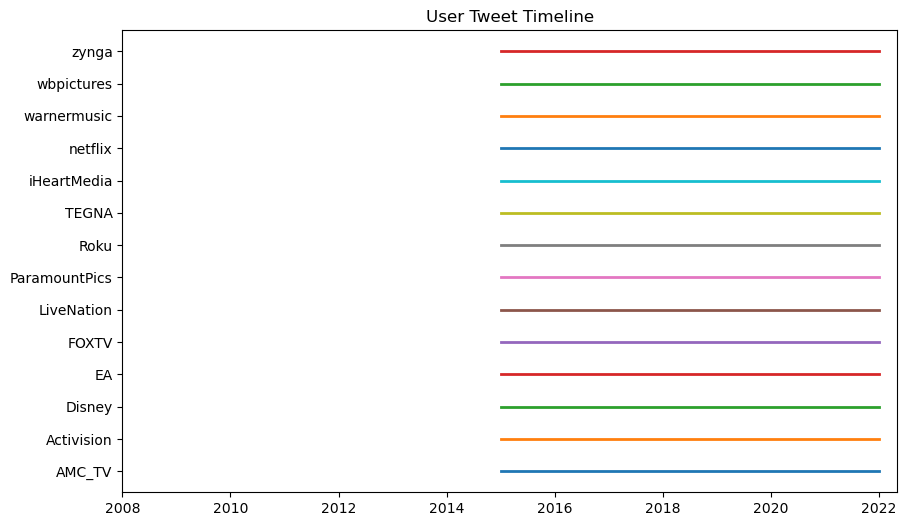

In [49]:
a=df.groupby(['user']).min()['date']
b=df.groupby(['user']).max()['date']
ab=pd.merge(a, b, left_on='user', right_on='user')
ab.columns=["earliest_tweet","latest_tweet"]
ab.earliest_tweet=ab.earliest_tweet.astype(str)
ab.latest_tweet=ab.latest_tweet.astype(str)
ab.earliest_tweet=ab.earliest_tweet.str[:4]
ab.latest_tweet=ab.latest_tweet.str[:4]
ab.earliest_tweet=ab.earliest_tweet.astype(int)
ab.latest_tweet=ab.latest_tweet.astype(int)
ab["user"]=ab.index
# Create a list of years from 2008 to 2023
years = list(range(2008, 2024))

# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate over each row in the dataframe
for index, row in ab.iterrows():
    user = row['user']
    earliest_tweet = row['earliest_tweet']
    latest_tweet = row['latest_tweet']

    # Create a line plot for each user
    plt.plot([earliest_tweet, latest_tweet], [user, user], linewidth=2)

# Customize the plot
#plt.xlabel('Year')
#plt.ylabel('User')
plt.title('User Tweet Timeline')
plt.yticks(ab['user'])
plt.xticks(range(2008, 2024, 2))

# Display the plot
plt.show()

In [50]:
# RUN ONLY ONCE
df["year"]=df.date.astype(str).str[:4].astype(int)
df["month"]=df.date.astype(str).str[5:7].astype(int)
df=df[df.year>=2015]
df=df[df.year<=2022]

## Content Columns

### Preprocess

#### Preprocess1 (Fundamental)

In [51]:
df["content_sentiment"]=df.content.copy()
df1=df.copy() #Create copy of df (fundamental)

In [52]:
def preprocess1(text):
    # Lowercase
    text = text.lower()
    # Remove links, websites, mentions
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text = re.sub(r'@\w+', '', text)

    # Remove emojis
    emojis = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emojis.sub(r'', text)

    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Expand the contractions
    text = contractions.fix(text)

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Word tokenization
    tokens = word_tokenize(text)

    # Remove single characters
    tokens = [token for token in tokens if len(token) > 1]

    # Convert more than 2 letter repetitions to 2 letters e.g., "funnnnny" --> "funny"
    tokens = [re.sub(r'(.)\1+', r'\1\1', token) for token in tokens]

    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

In [53]:
df1['content_sentiment'] = df1['content_sentiment'].apply(preprocess1)

#### Preprocess2 (remove hashtaged words)

In [54]:
df2=df.copy() #Create copy of df (fundamental)

In [55]:
def preprocess2(text):
    # Lowercase
    text = text.lower()
    # Remove links, websites, mentions
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text = re.sub(r'@\w+', '', text)
    
    # Remove words starting with '#'
    text = re.sub(r'\#\w+\s*', '', text)

    # Remove emojis
    emojis = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emojis.sub(r'', text)

    # Replace 2+ dots with space
    text = re.sub(r'\.{2,}', ' ', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Expand the contractions
    text = contractions.fix(text)

    # Remove punctuations
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Word tokenization
    tokens = word_tokenize(text)

    # Remove single characters
    tokens = [token for token in tokens if len(token) > 1]

    # Convert more than 2 letter repetitions to 2 letters e.g., "funnnnny" --> "funny"
    tokens = [re.sub(r'(.)\1+', r'\1\1', token) for token in tokens]

    # Remove numbers
    tokens = [token for token in tokens if not token.isdigit()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

In [56]:
df2['content_sentiment'] = df2['content_sentiment'].apply(preprocess2)

#### Preprocess3 (remove rare & frequent words)

In [57]:
df3=df1.copy() #Create copy of df (fundamental)

In [58]:
#Most common irrelevant words
from collections import Counter

# Flatten the list of tokens
all_tokens = [token for tokens in df3.content_sentiment for token in tokens]

# Count the occurrence of each word
word_counts = Counter(all_tokens)
frequent_words = pd.DataFrame(word_counts.most_common(300), columns=['word', 'occurrence'])
wordlist=["amp", "dm","c","tix","rt","th","gt","rsvp","pt","amex","tv"]
#frequent_words[frequent_words.word.isin(wordlist)]
frequent_words.head(10)
#amp (&amp), dm(direct message) , c (8|7c (Central time in US), tix (tickets), rt (retweet), th (8th), 
#gt (&gt), rsvp (please reply), pt(pasific time), amex (american express), tv(television)

,word,occurrence
0,us,11107
1,see,10166
2,get,9701
3,thanks,9208
4,live,8910
5,please,8295
6,presale,8221
7,new,7981
8,hi,7441
9,tickets,7207


In [59]:
word_counts = Counter([word for tokens in df3['content_sentiment'] for word in tokens])

# Count the number of unique word occurrences
occurrence_counts = Counter(word_counts.values())

# Create a dataframe from the occurrence counts
df3_occurrence = pd.DataFrame({'occurrence': list(occurrence_counts.keys()),
                              'word_quantity': list(occurrence_counts.values())})

# Sort the dataframe by occurrence in ascending order
df3_occurrence = df3_occurrence.sort_values('occurrence')
df3_occurrence.head(10)

,occurrence,word_quantity
49,1,20362
15,2,6249
46,3,3337
107,4,2108
101,5,1496
104,6,1145
18,7,833
3,8,741
14,9,612
183,10,514


In [60]:
#Remove Words - Most Frequent

remove_wordlist = ["amp","c","th","gt","pt"]

# Define a function to remove words from the tokens
def remove_words(tokens):
    return [token for token in tokens if token not in remove_wordlist]

# Apply the function to remove words from the tokenized column
df3['content_sentiment'] = df3['content_sentiment'].apply(remove_words)

In [61]:
#Replace common abbreviations
replace_dict = {'dm': 'message', 'tix': 'ticket', 'rt': 'retweet', 'rsvp': 'please reply', 'amex': 'american express','tv':'television'}

# Replace words in the tokenized column
df3['content_sentiment'] = [[replace_dict.get(word, word) for word in tokens] for tokens in df3['content_sentiment']]

In [62]:
#Remove the words occurred less than 10 times
words_to_remove = set(word for word, count in word_counts.items() if count < 10)
df3['content_sentiment'] = [[word for word in tokens if word not in words_to_remove] for tokens in df3['content_sentiment']]

#### Preprocess4 (replace slang)

In [63]:
df4=df1.copy() #Create copy of df (fundamental)

In [64]:
#Count Slangs for each user

#Get slang df
slang=pd.read_csv('cleaning_slang.csv',encoding='cp1252') 
slang_df=pd.DataFrame(slang)
slang_df.Column1=slang_df.Column1.astype(str)
slang_df.Column2=slang_df.Column2.astype(str)

In [65]:
# create a regex pattern that matches any of the slangs
pattern = '|'.join(r'\b{}\b'.format(slang) for slang in slang_df['Column1'])

#Convert content column into str
df4["content"]=df4["content"].astype(str)

# count the number of slangs in content using regex
df4['num_slangs'] = df4['content'].apply(lambda x: len(re.findall(pattern, x)))
# calculate the ratio of rows that have at least one slang/total rows for each user
ratio = df4.groupby('user',group_keys=True)['num_slangs'].apply(lambda x: (x > 0).sum() / len(x)).reset_index(name='ratio')

In [66]:
ratio.sort_values(by=["ratio"],ascending=False)

,user,ratio
10,netflix,0.027343
11,warnermusic,0.026837
7,Roku,0.026732
6,ParamountPics,0.020449
4,FOXTV,0.019027
5,LiveNation,0.017814
9,iHeartMedia,0.012238
0,AMC_TV,0.009893
1,Activision,0.008804
12,wbpictures,0.008054


In [67]:
#Frequency of Slangs
slangs_dict = {}

for row in df4.itertuples(index=False):
    content = row.content
    for slang in slang_df.Column1:
        if f" {slang} " in f" {content} ": 
            if slang in slangs_dict:
                slangs_dict[slang] += 1
            else:
                slangs_dict[slang] = 1

slang_sorted_d = dict( sorted(slangs_dict.items(), key=operator.itemgetter(1),reverse=True)) #Create a dictionary by sorting slangs_dict items
slang_df_sorted=pd.DataFrame(slang_sorted_d,index=[0]).T #Transpose the df
slang_df_sorted.rename(columns={0:"occurance"},inplace=True) #Change the column name
slang_df_sorted["Slang"]=slang_df_sorted.index # Create a column named Slang by taking indexes as basis
slang_df_merged=slang_df.merge(slang_df_sorted, left_on='Column1', right_on='Slang')[["Column1","Column2","occurance"]] #Merge two dfs to pull the occurances values 
slang_df_merged_sorted=slang_df_merged.sort_values(by=["occurance"],ascending=False) 
slang_df_merged_sorted.rename(columns={"Column1":"Slang","Column2":"Expanded"},inplace=True)
print("Total number of slangs: ",slang_df_sorted.occurance.sum())
slang_df_merged_sorted.head(10)

Total number of slangs:  1655


,Slang,Expanded,occurance
3,app,application,601
70,wanna,want to,104
65,u,you,91
69,vs,versus,78
10,bestie,best friend,72
74,x,kiss,71
60,thx,thanks,54
61,thx,thanks,54
51,pro,professional,49
68,ur,you are,47


In [68]:
#Convert slang columns into string
slang_df.Column1=slang_df.Column1.astype(str)
slang_df.Column2=slang_df.Column2.astype(str)

In [69]:
#Remove goof and goofy from the slang list because they are mentioned as cartoon chracters, not a slang
slang_df=slang_df[~slang_df.Column1.str.contains("goof")]
slang_dict = dict(zip(slang_df['Column1'], slang_df['Column2']))

In [70]:
def preprocess4(text):
    words = re.findall('\w+', text)
    for i in range(len(words)):
        if words[i] in slang_dict:
            words[i] = slang_dict[words[i]]
    text = ' '.join(words)
    return text

In [71]:
#Convert content_sentiment into str for preprocessing
df4["content_sentiment"]=df4["content_sentiment"].astype(str)
#Apply preprocess4
df4['content_sentiment'] = df4['content_sentiment'].apply(preprocess4)
#Tokenize str content_sentiment column
df4['content_sentiment'] = df4['content_sentiment'].apply(lambda x: word_tokenize(x))
#Drop num_slangs column
df4.drop(columns=["num_slangs"],inplace=True)

#### Preprocess5 (stemming)

In [70]:
df5=df1.copy()

In [71]:
stemmer = PorterStemmer()

# Apply stemming to the 'content_sentiment' column
df5['content_sentiment'] = df5['content_sentiment'].apply(lambda x: [stemmer.stem(word) for word in x])

#### Preprocess6 (Lemmatization)

In [72]:
df6=df1.copy()
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
    
#DID NOT CREATE A POS TAG FOR BERT

# Apply lemmatization and POS tagging to the 'content_sentiment' column
df6['content_sentiment'] = df6['content_sentiment'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag([word])[0][1])) for word in x])

NameError: name 'df6' is not defined

### Model Selection

In [ ]:
#Read Ground truth dataset: SemEval
#Read Tweets
devCE_t=pd.read_csv("C:/Users\M1ARDHIZ/Desktop/Thesis/2017_English_final/tweet/Subtasks_CE/devCE.txt",sep="\\t",header=None)
devtestCE_t=pd.read_csv("C:/Users\M1ARDHIZ/Desktop/Thesis/2017_English_final/tweet/Subtasks_CE/devtestCE.txt",sep="\\t",header=None)
testCE_t=pd.read_csv("C:/Users\M1ARDHIZ/Desktop/Thesis/2017_English_final/tweet/Subtasks_CE/testCE.txt",sep="\\t",header=None)
trainCE_t=pd.read_csv("C:/Users\M1ARDHIZ/Desktop/Thesis/2017_English_final/tweet/Subtasks_CE/trainCE.txt",sep="\\t",header=None)

#Concat 
semeval=pd.concat([devCE_t,devtestCE_t,testCE_t,trainCE_t])
semeval.set_axis(["id","username","label","content"],axis=1,inplace=True)
semeval.drop(columns=["id","username"],inplace=True)
semeval.label.unique()

#Drop duplicates
semeval.drop_duplicates(inplace=True)

#Replace labels to be in line with df_sent
semeval.label=semeval.label.replace([-2,-1,0,1,2],[3,3,1,2,2]) #1 neutral, 2positive, 3negative

#Reset Semeval index
semeval=semeval.reset_index(drop=True)

In [ ]:
# Split the data into semeval_big and semeval_small
# We want to compare the models, #No training is done on SemEval data. It was seen that 100% and 20% of the semeval data yield almost identical results.
#Therefore for the sake of faster processing, get 20% of the semeval data (semeval_small)
from sklearn.model_selection import train_test_split
semeval_big, semeval_small = train_test_split(semeval, test_size=0.2, random_state=42)
print("length of semeval_small:",len(semeval_small))

In [ ]:
# We evaluate the models on preprocessed data. Selected preprocess is preprocess1
semeval_small['content_sentiment'] = semeval_small['content'].apply(preprocess1)

#Create 5 identical semeval_small for applying 5 different pretrained models
semeval_small1=semeval_small.copy()
semeval_small2=semeval_small.copy()
semeval_small3=semeval_small.copy()
semeval_small4=semeval_small.copy()
semeval_small5=semeval_small.copy()

In [ ]:
# Load the sentiment analysis pipelines

MODEL1 = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_pipeline2 = pipeline('sentiment-analysis', model=MODEL1)

MODEL2 = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline1 = pipeline('sentiment-analysis', model=MODEL2)

MODEL3 = "btjiong/robbert-twitter-sentiment"
sentiment_pipeline3 = pipeline('sentiment-analysis', model=MODEL3)

MODEL4 = "cardiffnlp/xlm-twitter-politics-sentiment"
sentiment_pipeline4 = pipeline('sentiment-analysis', model=MODEL4)

MODEL5 = "citizenlab/twitter-xlm-roberta-base-sentiment-finetunned"
sentiment_pipeline5 = pipeline('sentiment-analysis', model=MODEL5)

In [ ]:
#Predict the sentiments based on content_sentiment column of each semeval_small
#1
with Pool(8) as p:
    semeval_small1['sentiment'] = [sentiment_pipeline1(text)[0]['label'] for text in semeval_small1['content_sentiment']]
#2
with Pool(8) as p:
    semeval_small2['sentiment'] = [sentiment_pipeline2(text)[0]['label'] for text in semeval_small2['content_sentiment']]
#3
with Pool(8) as p:
    semeval_small3['sentiment'] = [sentiment_pipeline3(text)[0]['label'] for text in semeval_small3['content_sentiment']]
#4
with Pool(8) as p:
    semeval_small4['sentiment'] = [sentiment_pipeline4(text)[0]['label'] for text in semeval_small4['content_sentiment']]
#5
with Pool(8) as p:
    semeval_small5['sentiment'] = [sentiment_pipeline5(text)[0]['label'] for text in semeval_small5['content_sentiment']]

In [ ]:
# Predicted sentiment labels are created differently in each Model. Map the names of predicted labels with that of actual labels
# In label column, the labels are: 1neutral, 2positive, 3negative
sentdict1={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} 
sentdict2={'neutral':1,"negative":3,"positive":2} 
sentdict3={"NEUTRAAL":1,"POSITIEF":2}
sentdict4={'Neutral':1,"Negative":3,"Positive":2} 
sentdict5={'Neutral':1,"Negative":3,"Positive":2} 

semeval_small1["sentiment_dum"]=semeval_small1.sentiment.map(sentdict1)
semeval_small2["sentiment_dum"]=semeval_small2.sentiment.map(sentdict2)
semeval_small3["sentiment_dum"]=semeval_small3.sentiment.map(sentdict3)
semeval_small4["sentiment_dum"]=semeval_small4.sentiment.map(sentdict4)
semeval_small5["sentiment_dum"]=semeval_small5.sentiment.map(sentdict5)

In [ ]:
# Predicted labels: sentiment_dum column
# Actual labels: label column
#Calculate classification report
report1 = classification_report(semeval_small1["label"], semeval_small1['sentiment_dum'])
report2 = classification_report(semeval_small2["label"], semeval_small2['sentiment_dum'])
report3 = classification_report(semeval_small3["label"], semeval_small3['sentiment_dum'])
report4 = classification_report(semeval_small4["label"], semeval_small4['sentiment_dum'])
report5 = classification_report(semeval_small5["label"], semeval_small5['sentiment_dum'])

In [ ]:
#print(report1) precision weighed average 56%
#print(report2) precision weighed average 53%
#print(report3) precision weighed average 40%
#print(report4) precision weighed average 46%
#print(report5) precision weighed average 34%

#best report is report1. Therefore Model1 is selected

### Apply Sentiment Model to DFs

In [ ]:
#DF1
# Load the sentiment analysis pipeline
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline = pipeline('sentiment-analysis', model=MODEL)
# Apply sentiment analysis to the training set and create a new column called sentiment
df1['sentiment'] = [sentiment_pipeline(text)[0]['label'] for text in df1['content_sentiment']]

In [ ]:
df1.to_csv("df1_sent.csv")

In [ ]:
#DF2
# Load the sentiment analysis pipeline
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline = pipeline('sentiment-analysis', model=MODEL)
# Apply sentiment analysis to the training set and create a new column called sentiment
df2['sentiment'] = [sentiment_pipeline(text)[0]['label'] for text in df2['content_sentiment']]

In [ ]:
df2.to_csv("df2_sent.csv")

In [ ]:
#DF3
# Load the sentiment analysis pipeline
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline = pipeline('sentiment-analysis', model=MODEL)
# Apply sentiment analysis to the training set and create a new column called sentiment
df3['sentiment'] = [sentiment_pipeline(text)[0]['label'] for text in df3['content_sentiment']]

In [ ]:
df3.to_csv("df3_sent.csv")

In [ ]:
#DF4
# Load the sentiment analysis pipeline
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline = pipeline('sentiment-analysis', model=MODEL)
# Apply sentiment analysis to the training set and create a new column called sentiment
df4['sentiment'] = [sentiment_pipeline(text)[0]['label'] for text in df4['content_sentiment']]

In [ ]:
df4.to_csv('df4_sent.csv')

In [ ]:
#DF5
# Load the sentiment analysis pipeline
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline = pipeline('sentiment-analysis', model=MODEL)
# Apply sentiment analysis to the training set and create a new column called sentiment
df5['sentiment'] = [sentiment_pipeline(text)[0]['label'] for text in df5['content_sentiment']]

In [ ]:
df5.to_csv('df5_sent.csv')

In [ ]:
#DF6
# Load the sentiment analysis pipeline
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
sentiment_pipeline = pipeline('sentiment-analysis', model=MODEL)
# Apply sentiment analysis to the training set and create a new column called sentiment
df6['sentiment'] = [sentiment_pipeline(text)[0]['label'] for text in df6['content_sentiment']]

In [ ]:
df6.to_csv('df6_sent.csv')

### Unsupervised Evaluation

In [ ]:
df1_sent=pd.read_csv("df1_sent.csv")

In [ ]:
# Silhouette Score (Unsupervised Evaluation)
from sklearn.feature_extraction.text import TfidfVectorizer

#Vectorize
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df1_sent['content'])

from sklearn.metrics import silhouette_score
#Convert LABEL_1, LABEL_2 and LABEL_3 into 1,2 and 3.
df1_sent["sentiment"]=pd.factorize(df1_sent["sentiment"])[0]+1                                                    

silhouette=silhouette_score(X,df1_sent["sentiment"])
silhouette
# 3.2302944941785596e-05
#It is very low, no significance.

### Supervised Evaluation with Fuzzy String Match

In [ ]:
df1_sent=pd.read_csv("df1_sent.csv")
df2_sent=pd.read_csv("df2_sent.csv")
df3_sent=pd.read_csv("df3_sent.csv")
df4_sent=pd.read_csv("df4_sent.csv")
df5_sent=pd.read_csv("df5_sent.csv")
df6_sent=pd.read_csv("df6_sent.csv")
df7_sent=pd.read_csv("df7_sent.csv")
semeval1=pd.read_csv("semeval1.csv")

#### DF1

In [ ]:
#Apply Preprocess to Semeval1
semeval1=semeval.copy()
semeval1['content_sent'] = semeval['content'].apply(preprocess1)

In [ ]:
#DF1 is splitted to df1_small and df1_big for first expriements for the sake of speed. However, then df1_small is chosen almost as the size of df1
#Threfore this step is actually inomportant.
#Bottomline: All dfx_smalls are 0.9999 of original df. So they are almost identical.
#dfx_smalls can be considered as df. Nothing will change regarding the success metrics.

from sklearn.model_selection import train_test_split
df1_big,df1_small=train_test_split(df1_sent,test_size=0.9999,random_state=42)
print(len(df1_small))

In [ ]:
#Change df1_small Labels to 1,2,3
sentdict={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} # 1neutral, 2positive, 3negative
df1_small["sentiment_dum"]=df1_small.sentiment.map(sentdict)

In [ ]:
from fuzzywuzzy import fuzz

# Function to find the best match from Semeval DataFrame based on fuzzy string matching
def find_best_match(tweet, semeval1):
    # Calculate the fuzzy string matching score for each tweet in df_gt
    scores = semeval1['content_sent'].apply(lambda x: fuzz.ratio(tweet, x))
    
    # Find the index of the tweet with the highest fuzzy string matching score
    best_match_index = scores.idxmax()
    
    # Return the sentiment label from the best matching tweet
    return semeval1.loc[best_match_index, 'label']

# Iterate through each tweet in df to assign ground truth sentiment labels
df1_small['ground_truth_sentiment'] = df1_small['content_sentiment'].apply(lambda x: find_best_match(x, semeval1))

# Assigned ground truth sentiment labels are assigned for each tweet in df
# Next, compare the clustering labels with the ground truth labels and calculate evaluation metrics
# Perform the evaluation and calculate metrics (accuracy, precision, recall, F1-score) based on sentiment clustering algorithm and the ground truth labels


In [ ]:
#DF1
df1_small["sentiment_dum"]=df1_small["sentiment_dum"].astype("int")

# Example evaluation code snippet
# cluster_label column in  DataFrame represents the sentiment clustering output
true_labels = df1_small['ground_truth_sentiment']
predicted_labels = df1_small['sentiment_dum']

# Calculate accuracy
accuracy = (true_labels == predicted_labels).mean()

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Accuracy: 0.4006578947368421
#Precision: 0.40536059569861166
#Recall: 0.4006578947368421


#### DF2

In [ ]:
#Apply Preprocess to Semeval2
semeval2=semeval.copy()
semeval2['content_sent'] = semeval['content'].apply(preprocess2)

In [ ]:
#Split DF2 for faster train
from sklearn.model_selection import train_test_split
df2_big,df2_small=train_test_split(df2_sent,test_size=0.9999,random_state=42)
print(len(df2_small))

In [ ]:
#Change df2_small Labels to 1,2,3
sentdict={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} # 1neutral, 2positive, 3negative
df2_small["sentiment_dum"]=df2_small.sentiment.map(sentdict)

In [ ]:
from fuzzywuzzy import fuzz
# Function to find the best match from Semeval DataFrame based on fuzzy string matching
def find_best_match(tweet, semeval2):
    # Calculate the fuzzy string matching score for each tweet in df_gt
    scores = semeval2['content_sent'].apply(lambda x: fuzz.ratio(tweet, x))
    
    # Find the index of the tweet with the highest fuzzy string matching score
    best_match_index = scores.idxmax()
    
    # Return the sentiment label from the best matching tweet
    return semeval2.loc[best_match_index, 'label']

# Iterate through each tweet in df to assign ground truth sentiment labels
df2_small['ground_truth_sentiment'] = df2_small['content_sentiment'].apply(lambda x: find_best_match(x, semeval2))


In [ ]:
#DF2
# Example evaluation code snippet
# cluster_label column in  DataFrame represents the sentiment clustering output
true_labels = df2_small['ground_truth_sentiment']
predicted_labels = df2_small['sentiment_dum']

# Calculate accuracy
accuracy = (true_labels == predicted_labels).mean()

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
#Accuracy: 0.43460293817184814
#Precision: 0.4609086276213032
#Recall: 0.43460293817184814

#### DF3

In [ ]:
#Apply Preprocess to Semeval3
semeval3=semeval1.copy() #DF3 is on top of DF1, semeval3 is on top of semeval1

#Most common irrelevant words
from collections import Counter
# Flatten the list of tokens
all_tokens = [token for tokens in semeval3.content_sent for token in tokens]

# Count the occurrence of each word
word_counts = Counter(all_tokens)
frequent_words = pd.DataFrame(word_counts.most_common(300), columns=['word', 'occurrence'])
wordlist=["amp", "dm","c","tix","rt","th","gt","rsvp","pt","amex","tv"]
print(frequent_words[frequent_words.word.isin(wordlist)])

word_counts = Counter([word for tokens in semeval3['content_sent'] for word in tokens])

# Count the number of unique word occurrences
occurrence_counts = Counter(word_counts.values())

# Create a dataframe from the occurrence counts
semeval3_occurrence = pd.DataFrame({'occurrence': list(occurrence_counts.keys()),
                              'word_quantity': list(occurrence_counts.values())})

# Sort the dataframe by occurrence in ascending order
semeval3_occurrence = semeval3_occurrence.sort_values('occurrence')

#Remove Words - Most Frequent

remove_wordlist = ["amp","c","th","gt","pt"]

# Define a function to remove words from the tokens
def remove_words(tokens):
    return [token for token in tokens if token not in remove_wordlist]

# Apply the function to remove words from the tokenized column
semeval3['content_sent'] = semeval3['content_sent'].apply(remove_words)

#Replace common abbreviations
replace_dict = {'dm': 'message', 'tix': 'ticket', 'rt': 'retweet', 'rsvp': 'please reply', 'amex': 'american express','tv':'television'}

# Replace words in the tokenized column
semeval3['content_sent'] = [[replace_dict.get(word, word) for word in tokens] for tokens in semeval3['content_sent']]

#Remove the words occurred less than 10 times
words_to_remove = set(word for word, count in word_counts.items() if count < 10)
semeval3['content_sent'] = [[word for word in tokens if word not in words_to_remove] for tokens in semeval3['content_sent']]

In [ ]:
#Split DF3 for faster train
from sklearn.model_selection import train_test_split
df3_big,df3_small=train_test_split(df3_sent,test_size=0.09999,random_state=42)
print(len(df3_small))

In [ ]:
#Change df3_small Labels to 1,2,3
sentdict={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} # 1neutral, 2positive, 3negative
df3_small["sentiment_dum"]=df3_small.sentiment.map(sentdict)

In [ ]:
from fuzzywuzzy import fuzz
# Function to find the best match from Semeval DataFrame based on fuzzy string matching
def find_best_match(tweet, semeval3):
    # Calculate the fuzzy string matching score for each tweet in df_gt
    scores = semeval3['content_sent'].apply(lambda x: fuzz.ratio(tweet, x))
    
    # Find the index of the tweet with the highest fuzzy string matching score
    best_match_index = scores.idxmax()
    
    # Return the sentiment label from the best matching tweet
    return semeval3.loc[best_match_index, 'label']

# Iterate through each tweet in df to assign ground truth sentiment labels
df3_small['ground_truth_sentiment'] = df3_small['content_sentiment'].apply(lambda x: find_best_match(x, semeval3))

In [ ]:
#DF3
# cluster_label column in  DataFrame represents the sentiment clustering output
true_labels = df3_small['ground_truth_sentiment']
predicted_labels = df3_small['sentiment_dum']

# Calculate accuracy
accuracy = (true_labels == predicted_labels).mean()

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Accuracy: 0.4415759800
#Precision: 0.415631691
#Recall: 0.441575900

#### DF4

In [ ]:
semeval4=semeval1.copy()

In [ ]:
# Apply Preprocess4 to semeval4

#Convert content column into str
semeval4["content"]=semeval4["content"].astype(str)

# count the number of slangs in content using regex
semeval4['num_slangs'] = semeval4['content'].apply(lambda x: len(re.findall(pattern, x)))

In [ ]:
# create a regex pattern that matches any of the slangs
pattern = '|'.join(r'\b{}\b'.format(slang) for slang in slang_df['Column1'])

#Convert content column into str
semeval4["content"]=semeval4["content"].astype(str)

# count the number of slangs in content using regex
semeval4['num_slangs'] = semeval4['content'].apply(lambda x: len(re.findall(pattern, x)))
# calculate the ratio of rows that have at least one slang/total rows for each user
#ratio = semeval4.groupby('user',group_keys=True)['num_slangs'].apply(lambda x: (x > 0).sum() / len(x)).reset_index(name='ratio')

#Frequency of Slangs
slangs_dict = {}

for row in semeval4.itertuples(index=False):
    content = row.content
    for slang in slang_df.Column1:
        if f" {slang} " in f" {content} ": 
            if slang in slangs_dict:
                slangs_dict[slang] += 1
            else:
                slangs_dict[slang] = 1

slang_sorted_d = dict( sorted(slangs_dict.items(), key=operator.itemgetter(1),reverse=True)) #Create a dictionary by sorting slangs_dict items
slang_df_sorted=pd.DataFrame(slang_sorted_d,index=[0]).T #Transpose the df
slang_df_sorted.rename(columns={0:"occurance"},inplace=True) #Change the column name
slang_df_sorted["Slang"]=slang_df_sorted.index # Create a column named Slang by taking indexes as basis
slang_df_merged=slang_df.merge(slang_df_sorted, left_on='Column1', right_on='Slang')[["Column1","Column2","occurance"]] #Merge two dfs to pull the occurances values 
slang_df_merged_sorted=slang_df_merged.sort_values(by=["occurance"],ascending=False) 
slang_df_merged_sorted.rename(columns={"Column1":"Slang","Column2":"Expanded"},inplace=True)
print("Total number of slangs: ",slang_df_sorted.occurance.sum())
slang_df_merged_sorted.head(10)

In [ ]:
#Convert slang columns into string
slang_df.Column1=slang_df.Column1.astype(str)
slang_df.Column2=slang_df.Column2.astype(str)
def preprocess4(text):
    words = re.findall('\w+', text)
    for i in range(len(words)):
        if words[i] in slang_dict:
            words[i] = slang_dict[words[i]]
    text = ' '.join(words)
    return text
#Convert content_sentiment into str for preprocessing
semeval4["content_sent"]=semeval4["content_sent"].astype(str)
#Apply preprocess4
semeval4['content_sent'] = semeval4['content_sent'].apply(preprocess4)
#Tokenize str content_sentiment column
semeval4['content_sent'] = semeval4['content_sent'].apply(lambda x: word_tokenize(x))
#Drop num_slangs column
#df4.drop(columns=["num_slangs"],inplace=True)

In [ ]:
#Split DF4 for faster train
from sklearn.model_selection import train_test_split
df4_big,df4_small=train_test_split(df4_sent,test_size=0.9999,random_state=42)
print(len(df4_small))

In [ ]:
#Change df4_small Labels to 1,2,3
sentdict={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} # 1neutral, 2positive, 3negative
df4_small["sentiment_dum"]=df4_small.sentiment.map(sentdict)

In [ ]:
from fuzzywuzzy import fuzz
# Function to find the best match from Semeval DataFrame based on fuzzy string matching
def find_best_match(tweet, semeval4):
    # Calculate the fuzzy string matching score for each tweet in df_gt
    scores = semeval4['content_sent'].apply(lambda x: fuzz.ratio(tweet, x))
    
    # Find the index of the tweet with the highest fuzzy string matching score
    best_match_index = scores.idxmax()
    
    # Return the sentiment label from the best matching tweet
    return semeval4.loc[best_match_index, 'label']

# Iterate through each tweet in df to assign ground truth sentiment labels
df4_small['ground_truth_sentiment'] = df4_small['content_sentiment'].apply(lambda x: find_best_match(x, semeval4))

In [ ]:
#DF4
# cluster_label column in  DataFrame represents the sentiment clustering output
true_labels = df4_small['ground_truth_sentiment']
predicted_labels = df4_small['sentiment_dum']

# Calculate accuracy
accuracy = (true_labels == predicted_labels).mean()

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Accuracy: 0.4288798778240034
#Precision: 0.46168863255035786
#Recall: 0.4288798778240034

#### DF5

In [ ]:
#Apply Preprocess to Semeval5
semeval5=semeval1.copy()

# Apply stemming to the 'content_sentiment' column
semeval5['content_sent'] = semeval5['content_sent'].apply(lambda x: [stemmer.stem(word) for word in x])

In [ ]:
#Split DF5 for faster train
from sklearn.model_selection import train_test_split
df5_big,df5_small=train_test_split(df5_sent,test_size=0.9999,random_state=42)
print(len(df5_small))

In [ ]:
#Change df5_small Labels to 1,2,3
sentdict={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} # 1neutral, 2positive, 3negative
df5_small["sentiment_dum"]=df5_small.sentiment.map(sentdict)

In [ ]:
from fuzzywuzzy import fuzz
# Function to find the best match from Semeval DataFrame based on fuzzy string matching
def find_best_match(tweet, semeval5):
    # Calculate the fuzzy string matching score for each tweet in df_gt
    scores = semeval5['content_sent'].apply(lambda x: fuzz.ratio(tweet, x))
    
    # Find the index of the tweet with the highest fuzzy string matching score
    best_match_index = scores.idxmax()
    
    # Return the sentiment label from the best matching tweet
    return semeval5.loc[best_match_index, 'label']

# Iterate through each tweet in df to assign ground truth sentiment labels
df5_small['ground_truth_sentiment'] = df5_small['content_sentiment'].apply(lambda x: find_best_match(x, semeval5))

In [ ]:
#Change df5_small Labels to 1,2,3
sentdict={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} # 1neutral, 2positive, 3negative
df5_small["sentiment_dum"]=df5_small.sentiment.map(sentdict)

In [ ]:
#DF5 = 1
# cluster_label column in  DataFrame represents the sentiment clustering output
true_labels = df5_small['ground_truth_sentiment']
predicted_labels = df5_small['sentiment_dum']

# Calculate accuracy
accuracy = (true_labels == predicted_labels).mean()

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Accuracy: 0.42174788086981035
#Precision: 0.4478631359859964
#Recall: 0.42174788086981035

#### DF6

In [ ]:
#Apply Preprocess to Semeval6
semeval6=semeval1.copy()
# Define a function to convert POS tags to WordNet POS tags
def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN  # Default to noun if no specific POS tag is found

# Apply lemmatization and POS tagging to the 'content_sentiment' column
semeval6['content_sent'] = semeval6['content_sent'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag([word])[0][1])) for word in x])

In [ ]:
#Split DF6 for faster train
from sklearn.model_selection import train_test_split
df6_big,df6_small=train_test_split(df6_sent,test_size=0.9999,random_state=42)
print(len(df6_small))

In [ ]:
#Change df6_small Labels to 1,2,3
sentdict={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} # 1neutral, 2positive, 3negative
df6_small["sentiment_dum"]=df6_small.sentiment.map(sentdict)

In [ ]:
# Function to find the best match from Semeval DataFrame based on fuzzy string matching
def find_best_match(tweet, semeval6):
    # Calculate the fuzzy string matching score for each tweet in df_gt
    scores = semeval6['content_sent'].apply(lambda x: fuzz.ratio(tweet, x))
    
    # Find the index of the tweet with the highest fuzzy string matching score
    best_match_index = scores.idxmax()
    
    # Return the sentiment label from the best matching tweet
    return semeval6.loc[best_match_index, 'label']

# Iterate through each tweet in df to assign ground truth sentiment labels
df6_small['ground_truth_sentiment'] = df6_small['content_sentiment'].apply(lambda x: find_best_match(x, semeval6))

In [ ]:
#DF6
# Example evaluation code snippet
# cluster_label column in  DataFrame represents the sentiment clustering output
true_labels = df6_small['ground_truth_sentiment']
predicted_labels = df6_small['sentiment_dum']

# Calculate accuracy
accuracy = (true_labels == predicted_labels).mean()

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Accuracy: 0.42421937996184583
#Precision: 0.4642745087463766
#Recall: 0.42421937996184583

#### DF7

In [76]:
#DF7
#First, preprocess df7
df7=df2.copy() #df7 contains preprocess2
df7=df7[df7['content_sentiment'].map(len) > 0]

#Preprocess3
#Remove the words occurred less than 10 times
words_to_remove = set(word for word, count in word_counts.items() if count < 10)
df7['content_sentiment'] = [[word for word in tokens if word not in words_to_remove] for tokens in df7['content_sentiment']]

#Preprocess4
df7["content_sentiment"]=df7["content_sentiment"].astype(str)
#Apply preprocess4
df7['content_sentiment'] = df7['content_sentiment'].apply(preprocess4)
#Tokenize str content_sentiment column
df7['content_sentiment'] = df7['content_sentiment'].apply(lambda x: word_tokenize(x))

#Skip preprocess 5 because lemmatization is chosen ovr stemming

#Preprocess 6
# Apply lemmatization and POS tagging to the 'content_sentiment' column
def get_wordnet_pos(tag):
    if tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('J'):
        return wordnet.ADJ
    else:
        return wordnet.NOUN  # Default to noun if no specific POS tag is found
df7['content_sentiment'] = df7['content_sentiment'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag([word])[0][1])) for word in x])

In [81]:
# Load the sentiment analysis pipeline
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
with Pool(8) as p:
    sentiment_pipeline = pipeline('sentiment-analysis', model=MODEL)
# Apply sentiment analysis to the training set and create a new column called sentiment
    df7['sentiment'] = [sentiment_pipeline(text)[0]['label'] for text in df7['content_sentiment']]

KeyboardInterrupt: 

In [ ]:
#Change df7 Labels to 1,2,3
sentdict={"LABEL_1":1,"LABEL_2":2,"LABEL_0":3} # 1neutral, 2positive, 3negative
df7_sent["sentiment_dum"]=df7_sent.sentiment.map(sentdict)

#Apply Preprocess to Semeval7
semeval7=semeval1.copy()
semeval7["content_sent"]=semeval7["content_sent"].astype(str)
#Apply preprocess4
semeval7['content_sent'] = semeval7['content_sent'].apply(preprocess4)
#Tokenize str content_sentiment column
semeval7['content_sent'] = semeval7['content_sent'].apply(lambda x: word_tokenize(x))


#Apply Lemmatization to Semeval7
semeval7['content_sent'] = semeval7['content_sent'].apply(lambda x: [lemmatizer.lemmatize(word, get_wordnet_pos(pos_tag([word])[0][1])) for word in x])

In [ ]:
from thefuzz import fuzz
# Function to find the best match from Semeval DataFrame based on fuzzy string matching
def find_best_match(tweet, semeval7):
    # Calculate the fuzzy string matching score for each tweet in df_gt
    scores = semeval7['content_sent'].apply(lambda x: fuzz.ratio(tweet, x))
    
    # Find the index of the tweet with the highest fuzzy string matching score
    best_match_index = scores.idxmax()
    
    # Return the sentiment label from the best matching tweet
    return semeval7.loc[best_match_index, 'label']

# Iterate through each tweet in df to assign ground truth sentiment labels
df7_sent['ground_truth_sentiment'] = df7_sent['content_sentiment'].apply(lambda x: find_best_match(x, semeval7))

In [ ]:
#DF7
# Example evaluation code snippet
# cluster_label column in  DataFrame represents the sentiment clustering output
true_labels = df7['ground_truth_sentiment']
predicted_labels = df7['sentiment_dum']

# Calculate accuracy
accuracy = (true_labels == predicted_labels).mean()

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#Accuracy: 0.44555231906789156
#Precision: 0.48672140916806694
#Recall: 0.44555231906789156

In [ ]:
report7 = classification_report(true_labels, predicted_labels)

In [ ]:
report_df7 = classification_report(true_labels,predicted_labels)
print(report_df7)

In [ ]:
df7.to_csv("df7_sent.csv")

### New Features

In [83]:
df7_sent=pd.read_csv("df7_sent.csv")

In [100]:
df7_sent

,Unnamed: 0,user,content,follow,friend,reply,quote,lan,rt,like,date,partofday,times,month,mention,time,year,content_sentiment,sentiment
0,87,Disney,"May your magic never fade, even after the clock strikes midnight. ✨ Happy New Year! https://t.co/TFen027NXf",10012728.0,108.0,66.0,26.0,en,792.0,4255.0,2022-12-31,afternoon,14:00:00,12,NaN,14,2022,"['may', 'magic', 'never', 'fade', 'even', 'clock', 'strike', 'midnight', 'happy', 'new', 'year']",LABEL_1
1,88,Disney,Remembering Disney Legend Barbara Walters: https://t.co/fBMScPht7v https://t.co/GOpO4ipdDd,10012728.0,108.0,37.0,8.0,en,187.0,1869.0,2022-12-31,evening,23:00:00,12,NaN,23,2022,"['remember', 'disney', 'legend', 'barbara', 'walter']",LABEL_1
2,89,Disney,"You can hear the mighty heartbeat. 💙\n \nWitness #AvatarTheWayOfWater in 3D, now playing only in theaters. Get tickets: https://t.co/w7kYsHS8Ln https://t.co/U6CthX9Xhk",10012728.0,108.0,29.0,8.0,en,78.0,857.0,2022-12-30,afternoon,18:00:00,12,NaN,18,2022,"['hear', 'mighty', 'heartbeat', 'witness', '3d', 'play', 'theater', 'get', 'ticket']",LABEL_1
3,90,Disney,A new year is on the horizon and adventure and excitement are ahead! https://t.co/dND2nA3eIJ,10012728.0,108.0,21.0,10.0,en,258.0,1766.0,2022-12-30,afternoon,17:00:00,12,NaN,17,2022,"['new', 'year', 'horizon', 'adventure', 'excitement', 'ahead']",LABEL_1
4,91,Disney,"Take your next streaming adventure to a galaxy far, far away. 🌟 You can stream the entire first season of #Andor, only on @DisneyPlus. https://t.co/DXBwdPQWWf",10012728.0,108.0,9.0,3.0,en,30.0,311.0,2022-12-30,afternoon,16:00:00,12,DisneyPlus,16,2022,"['take', 'next', 'stream', 'adventure', 'galaxy', 'far', 'far', 'away', 'stream', 'entire', 'first', 'season']",LABEL_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151716,240811,Roku,@aPieceof_BDG So sorry to hear that! Anything we can do to help?,227234.0,1780.0,1.0,0.0,en,0.0,0.0,2015-01-02,afternoon,13:00:00,1,NaN,13,2015,"['sorry', 'hear', 'anything', 'help']",LABEL_0
151717,240812,Roku,@AlexSummerfield You should get a response within 48 hours. Can you DM us the email address you used so we can check?,227234.0,1780.0,1.0,0.0,en,0.0,0.0,2015-01-02,afternoon,13:00:00,1,AlexSummerfield,13,2015,"['get', 'response', 'within', 'hour', 'dm', 'u', 'email', 'address', 'use', 'check']",LABEL_1
151718,240813,Roku,"#HappyNewYear, streamers! What's first on your 2015 watch list? http://t.co/Z4logqTtCO",227234.0,1780.0,6.0,0.0,en,4.0,14.0,2015-01-01,morning,12:00:00,1,NaN,12,2015,"['streamer', 'first', 'watch', 'list']",LABEL_1
151719,240814,Roku,Frozen was the most searched for movie using Roku Search in 2014. What was your top movie pick of the year? http://t.co/rYBlJ2wi3a,227234.0,1780.0,6.0,0.0,en,4.0,3.0,2015-01-01,evening,21:00:00,1,NaN,21,2015,"['frozen', 'search', 'movie', 'use', 'roku', 'search', 'top', 'movie', 'pick', 'year']",LABEL_1


In [101]:
df7_final=df7_sent.copy()

In [102]:
#for a faster processing where all CPU cores are used
from functools import partial
from itertools import repeat
from multiprocessing import Pool, freeze_support
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [103]:
# Sample data
#data = {'content': ['#asd #as @john is a great person @jane', '#asd @jim is awesome #ssa', '#sss @asd #hello']}
#df_ex = pd.DataFrame(data)


# hashtag and mention places
def count_mentions_hashtags(text):
    # Splitting the text into three sections: first, middle, and last
    text_length = len(text)
    section_length = text_length // 3
    first_section = text[:int(section_length)]
    middle_section = text[int(section_length):int(section_length*2)]
    last_section = text[int(section_length*2):]
    
    # Count mentions in each section
    mention_beginning = len(re.findall(r'@\w{2,}', first_section))
    mention_middle = len(re.findall(r'@\w{2,}', middle_section))
    mention_last = len(re.findall(r'@\w{2,}', last_section))
    
    # Count hashtags in each section
    hashtag_beginning = len(re.findall(r'#\w{2,}', first_section))
    hashtag_middle = len(re.findall(r'#\w{2,}', middle_section))
    hashtag_last = len(re.findall(r'#\w{2,}', last_section))
    
    return mention_beginning, mention_middle, mention_last, hashtag_beginning, hashtag_middle, hashtag_last

# Apply the function to create new columns
df7_final[['mention_beginning', 'mention_middle', 'mention_last',
    'hashtag_beginning', 'hashtag_middle', 'hashtag_last']] = df7_final['content'].apply(count_mentions_hashtags).apply(pd.Series)

In [104]:
#Misused hashtag count
def count_misused_hashtags(text):
    misused_count = 0
    words = text.split()
    for word in words:
        if word.startswith('#'):
            if len(word) <= 3 or (word[1:].startswith('#')):
                misused_count += 1
    return misused_count

# valid hashtag count
def count_valid_hashtags(text):
    valid_count = 0
    words = text.split()
    for word in words:
        if word.startswith('#'):
            hashtag = word[1:]  # Remove the '#' symbol from the word
            if len(hashtag) > 3 and hashtag[0].isalnum():
                valid_count += 1
    return valid_count

# valid mention count
def count_valid_mentions(text):
    valid_count = 0
    words = text.split()
    for word in words:
        if word.startswith('@'):
            mention = word[1:]  # Remove the '@' symbol from the word
            if len(mention) > 1 and (mention[0].isalnum() or mention[0] == '_' or mention[0] == '-'):
                valid_count += 1
    return valid_count



# word count, character count, url count
def preprocess_text(text):
    urls = re.findall(r'(https?://\S+)', text)
    for url in urls:
        text = text.replace(url, 'URL_PLACEHOLDER')
    return text
# Function to count URLs in a text
def count_urls(text):
    urls = re.findall(r'(https?://\S+)', text)
    return len(urls)



# Function to calculate the capitalization ratio
def calculate_capitalization_ratio(text):
    words = text.split()
    capitalized_words = [word for word in words if word[0].isupper()]
    return len(capitalized_words) / len(words)
# Function to count exclamation marks
def count_exclamation_marks(text):
    return text.count('!')
# Function to count question marks
def count_question_marks(text):
    return text.count('?')
# Function to count emojis
def count_emojis(text):
    emojis = [c for c in text if c in emoji.EMOJI_DATA]
    return len(emojis)



# Function to calculate the average word length
def calculate_average_word_length(text):
    words = nltk.word_tokenize(text)
    word_lengths = [len(word) for word in words]
    return sum(word_lengths) / len(word_lengths)
# Function to count punctuation marks
def count_punctuation_marks(text):
    punctuation_count = 0
    for char in text:
        if char in string.punctuation:
            punctuation_count += 1
    return punctuation_count
# Function to count stopwords
stopwords_set = set(stopwords.words('english'))
def count_stopwords(text):
    words = nltk.word_tokenize(text)
    stopwords_count = sum(1 for word in words if word.lower() in stopwords_set)
    return stopwords_count

In [105]:
# hashtag count, mention count
df7_final['hashtag_count'] = df7_final['content'].apply(count_valid_hashtags)
df7_final["mention_count"] = df7_final['content'].apply(count_valid_mentions)

# word count, character count, and URL count
df7_final['preprocessed_content'] = df7_final['content'].apply(preprocess_text)
df7_final['word_count'] = df7_final['preprocessed_content'].apply(lambda x: len(nltk.word_tokenize(x)))
df7_final['character_count'] = df7_final['content'].apply(lambda x: len(x))
df7_final['url_count'] = df7_final['content'].apply(count_urls)


# capitalization ratio, exclamation mark count, question mark count, and emoji count
df7_final['capitalization_ratio'] = df7_final['content'].apply(calculate_capitalization_ratio)
df7_final['exclamation_mark_count'] = df7_final['content'].apply(count_exclamation_marks)
df7_final['question_mark_count'] = df7_final['content'].apply(count_question_marks)
df7_final['emoji_count'] = df7_final['content'].apply(count_emojis)

#Average word length, punctiation count, stopword count
df7_final['average_word_length'] = df7_final['content'].apply(calculate_average_word_length)
df7_final['punctuation_count'] = df7_final['content'].apply(count_punctuation_marks)
df7_final['stopword_count'] = df7_final['content'].apply(count_stopwords)

#nltklibrary is used for tokenization and counting stopwords, and stopwords within English corpus are used

In [90]:
#Binary Classification
df7_final.loc[df7_final['rt'] == 0, 'rt_binary'] = 0
df7_final.loc[df7_final['rt'] != 0, 'rt_binary'] = 1

In [91]:
df7_final.loc[(df7_final['rt'] == 0)                          , 'rt_multi'] = '0'
df7_final.loc[(df7_final['rt'] > 0)     &(df7_final['rt'] <= 100)   , 'rt_multi'] = '1-100'
df7_final.loc[(df7_final['rt'] > 100)   &(df7_final['rt'] <= 1000)  , 'rt_multi'] = '100-1000'
df7_final.loc[(df7_final['rt'] > 1000)  &(df7_final['rt'] <= 10000) , 'rt_multi'] = '1000-10000'
df7_final.loc[(df7_final['rt'] > 10000), 'rt_multi'] = '10000 - more'

In [92]:
drop_columns=["Unnamed: 0","reply","quote","lan","rt","like","date","times","mention","year","content_sentiment","preprocessed_content"]

In [93]:
df7_final.drop(columns=drop_columns,inplace=True)

In [94]:
#Change name of the labels to neutral, positive and negative
sentimentmap={"LABEL_1":"neutral","LABEL_2":"positive","LABEL_0":"negative"}
df7_final.sentiment=df7_final.sentiment.map(sentimentmap)

In [107]:
#One hot encoding for df7_final
one_hot_encoded1=pd.get_dummies(df7_final["partofday"],prefix="partofday")
one_hot_encoded2=pd.get_dummies(df7_final["sentiment"],prefix="sentiment")
df7_final=pd.concat([df7_final,one_hot_encoded1,one_hot_encoded2],axis=1)
df7_final.drop(columns=["sentiment","partofday"],inplace=True)

In [109]:
df7_final

,Unnamed: 0,user,content,follow,friend,reply,quote,lan,rt,like,...,average_word_length,punctuation_count,stopword_count,partofday_afternoon,partofday_evening,partofday_latenight,partofday_morning,sentiment_LABEL_0,sentiment_LABEL_1,sentiment_LABEL_2
0,87,Disney,"May your magic never fade, even after the clock strikes midnight. ✨ Happy New Year! https://t.co/TFen027NXf",10012728.0,108.0,66.0,26.0,en,792.0,4255.0,...,4.380952,8,3,1,0,0,0,0,1,0
1,88,Disney,Remembering Disney Legend Barbara Walters: https://t.co/fBMScPht7v https://t.co/GOpO4ipdDd,10012728.0,108.0,37.0,8.0,en,187.0,1869.0,...,7.000000,11,0,0,1,0,0,0,1,0
2,89,Disney,"You can hear the mighty heartbeat. 💙\n \nWitness #AvatarTheWayOfWater in 3D, now playing only in theaters. Get tickets: https://t.co/w7kYsHS8Ln https://t.co/U6CthX9Xhk",10012728.0,108.0,29.0,8.0,en,78.0,857.0,...,4.965517,15,7,1,0,0,0,0,1,0
3,90,Disney,A new year is on the horizon and adventure and excitement are ahead! https://t.co/dND2nA3eIJ,10012728.0,108.0,21.0,10.0,en,258.0,1766.0,...,4.647059,6,7,1,0,0,0,0,1,0
4,91,Disney,"Take your next streaming adventure to a galaxy far, far away. 🌟 You can stream the entire first season of #Andor, only on @DisneyPlus. https://t.co/DXBwdPQWWf",10012728.0,108.0,9.0,3.0,en,30.0,311.0,...,4.060606,11,9,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151716,240811,Roku,@aPieceof_BDG So sorry to hear that! Anything we can do to help?,227234.0,1780.0,1.0,0.0,en,0.0,0.0,...,3.533333,4,7,1,0,0,0,1,0,0
151717,240812,Roku,@AlexSummerfield You should get a response within 48 hours. Can you DM us the email address you used so we can check?,227234.0,1780.0,1.0,0.0,en,0.0,0.0,...,3.840000,3,10,1,0,0,0,0,1,0
151718,240813,Roku,"#HappyNewYear, streamers! What's first on your 2015 watch list? http://t.co/Z4logqTtCO",227234.0,1780.0,6.0,0.0,en,4.0,14.0,...,4.529412,10,3,0,0,0,1,0,1,0
151719,240814,Roku,Frozen was the most searched for movie using Roku Search in 2014. What was your top movie pick of the year? http://t.co/rYBlJ2wi3a,227234.0,1780.0,6.0,0.0,en,4.0,3.0,...,4.192308,7,10,0,1,0,0,0,1,0


In [110]:
df7_final.to_csv("df7_sent2.csv")